# Include pathway results

Load in these files we made earlier:

In [1]:
import os
import pandas as pd
from stroke_maps.combine import Combine
import stroke_maps.geo
import stroke_maps.plot

combine = Combine()

In [2]:
dir_files = os.path.join('output', 'steven_seagull', 'drip-and-ship')

Load in outputs from catchment area class:

In [3]:
path_to_file = os.path.join(dir_files, 'df_lsoa.csv')
df_lsoa_input = pd.read_csv(path_to_file, index_col=[0, 1])

path_to_file = os.path.join(dir_files, 'df_units.csv')
df_units_input = pd.read_csv(path_to_file, index_col=[0])

path_to_file = os.path.join(dir_files, 'df_transfer.csv')
df_transfer_input = pd.read_csv(path_to_file, index_col=[0])

In [4]:
df_transfer_input = df_transfer_input.reset_index()
df_transfer_input = df_transfer_input.set_index(['postcode', 'transfer_unit_postcode'])

Load in results from pathway:

In [5]:
path_to_file = os.path.join(dir_files, 'results_summary_by_admitting_unit.csv')
df_units_results = pd.read_csv(path_to_file, index_col=[0], header=[0, 1])

path_to_file = os.path.join(dir_files, 'results_summary_by_lsoa.csv')
df_lsoa_results = pd.read_csv(path_to_file, index_col=[0, 1], header=[0, 1])

Make sure the inputs and results have the same index columns for merging:

In [6]:
df_lsoa_input.index.names

FrozenList(['lsoa', 'lsoa_code'])

In [7]:
df_lsoa_results.index.names

FrozenList(['lsoa', 'lsoa_code'])

In [8]:
df_units_input.index.names

FrozenList(['postcode'])

In [9]:
df_units_results.index.names

FrozenList(['unit'])

Update the different index name:

In [10]:
df_units_results.index.name = 'postcode'

In [11]:
df_units_results.index.names

FrozenList(['postcode'])

Combine:

In [12]:
df_units_combined = combine.combine_inputs_and_results(
    df_units_input, df_units_results, how='left')

In [13]:
df_lsoa_combined = combine.combine_inputs_and_results(
    df_lsoa_input, df_lsoa_results, how='left')

## Create geometry data

In [17]:
(
    gdf_boundaries_regions,
    gdf_points_units,
    gdf_lines_transfer,
    gdf_boundaries_lsoa,
    gdf_boundaries_catchment
) = stroke_maps.geo.main(
    df_lsoa_combined, df_units_combined, df_transfer=df_transfer_input
    )

/home/anna/miniconda3/envs/stroke_maps_dev/lib/python3.12/site-packages/stroke_maps/geo.py:531: PerformanceWarning: indexing past lexsort depth may impact performance.
  mask_units = df_units[('periphery_unit', scenario)] == 1


## Setup for maps

Crop all geometry data to the same axis limits and assign colours to the catchment areas:

In [19]:
(
gdf_boundaries_regions,
gdf_points_units,
gdf_boundaries_catchment,
gdf_boundaries_lsoa,
gdf_lines_transfer,
box_shared,
map_extent_shared
        ) = stroke_maps.plot.main(
    gdf_boundaries_regions,
    gdf_points_units,
    gdf_boundaries_catchment,
    gdf_boundaries_lsoa,
    gdf_lines_transfer,
    crop_axis_leeway=5000
    )

/home/anna/miniconda3/envs/stroke_maps_dev/lib/python3.12/site-packages/geopandas/array.py:1459: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as OSGB36 / British National Grid (the single non-null crs provided).
  return GeometryArray(data, crs=_get_common_crs(to_concat))
/home/anna/miniconda3/envs/stroke_maps_dev/lib/python3.12/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/home/anna/miniconda3/envs/stroke_maps_dev/lib/python3.12/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

## Plotting

Although we didn't explicitly name this scenario in the files, the geo.main() function gives the GeoDataFrames a scenario column heading where the default label is 'scenario'.

In [20]:
scenario='scenario'

With the pathway data included, can also plot outcomes:

id
0           <NA>
1      -0.541483
2      -0.566905
3      -0.560219
4      -0.539067
          ...   
2940        <NA>
2941        <NA>
2942        <NA>
2943   -0.515512
2944   -0.511643
Name: (mRS shift, mean), Length: 2945, dtype: Float64


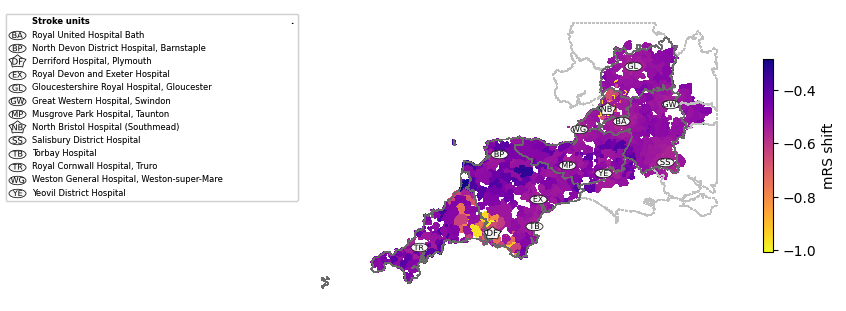

In [24]:
outcome = 'mRS shift'

stroke_maps.plot.plot_map_outcome(
    gdf_boundaries_lsoa,
    gdf_boundaries_regions,
    gdf_points_units,
    scenario=scenario,
    outcome=outcome,
)

id
0           <NA>
1       0.688337
2         0.3858
3       0.384453
4       0.687885
          ...   
2940        <NA>
2941        <NA>
2942        <NA>
2943    0.683469
2944    0.631352
Name: (mRS 0-2, mean), Length: 2945, dtype: Float64


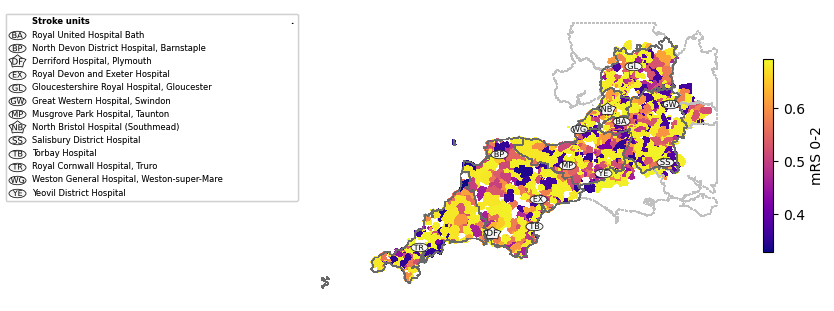

In [25]:
outcome = 'mRS 0-2'

stroke_maps.plot.plot_map_outcome(
    gdf_boundaries_lsoa,
    gdf_boundaries_regions,
    gdf_points_units,
    scenario=scenario,
    outcome=outcome,
)

id
0           <NA>
1       0.099447
2       0.114929
3       0.113665
4        0.09903
          ...   
2940        <NA>
2941        <NA>
2942        <NA>
2943    0.094956
2944    0.095927
Name: (utility_shift, mean), Length: 2945, dtype: Float64


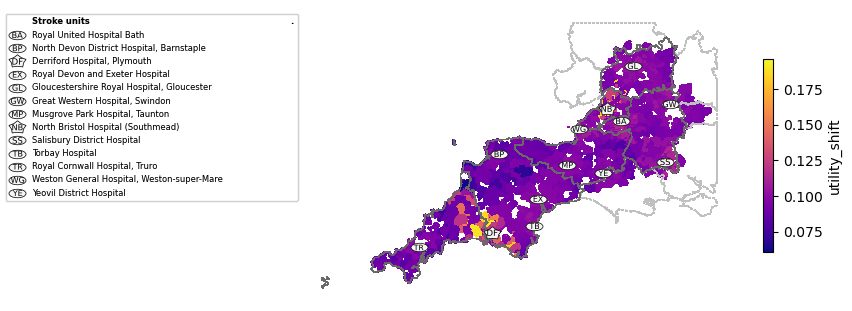

In [26]:
outcome = 'utility_shift'

stroke_maps.plot.plot_map_outcome(
    gdf_boundaries_lsoa,
    gdf_boundaries_regions,
    gdf_points_units,
    scenario=scenario,
    outcome=outcome,
)